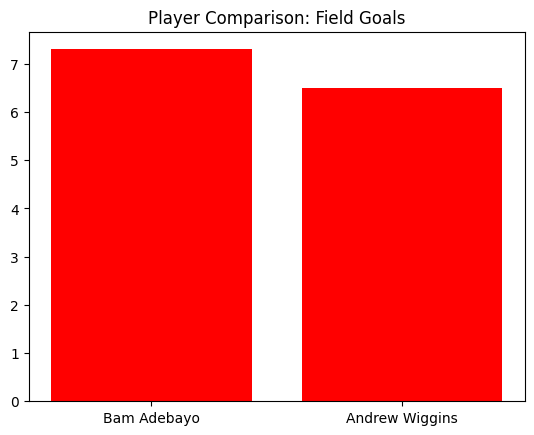

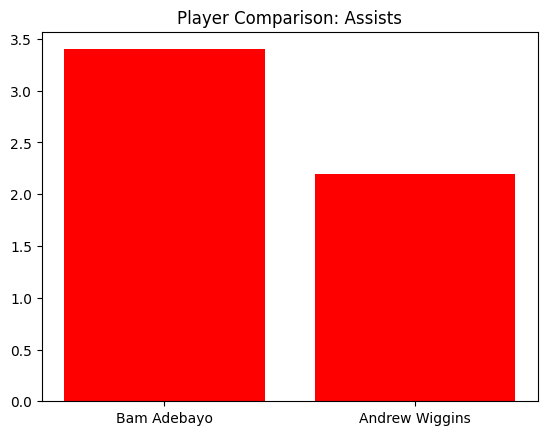

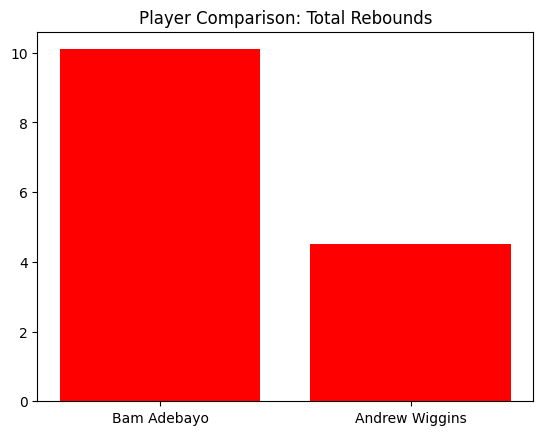

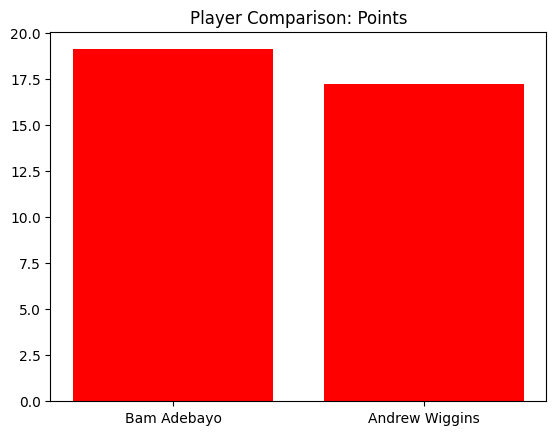

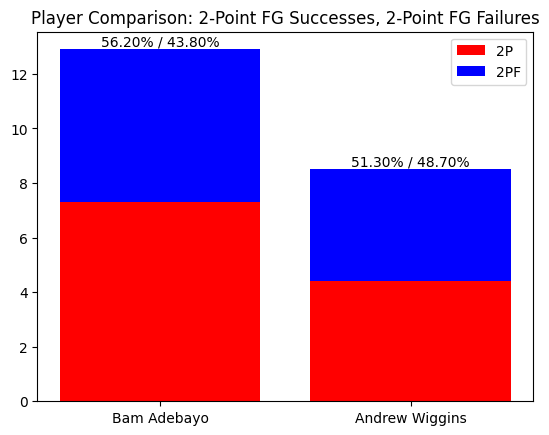

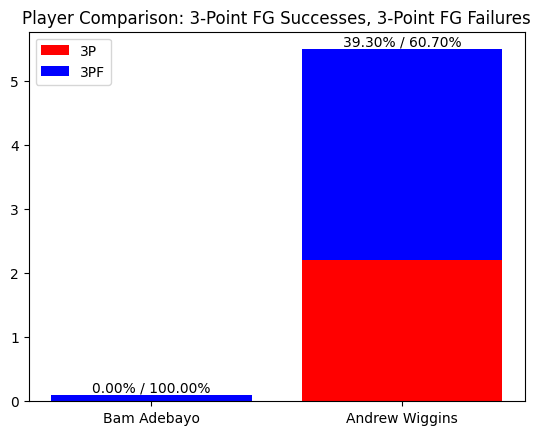

In [5]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def main():

    path = 'nba_stats.csv' # MIGHT NEED TO CHANGE, BE CAREFUL
    data = pd.read_csv(path, encoding="latin-1",sep=";") #latin-1 circumvents an issue i had with parsing the file.

    # CLEANING DATASET & ADDING EXTRA VARIABLES
    players_of_interest=["Bam Adebayo", "Anthony Edwards", "De’Aaron Fox", "Jaylen Brown", "Anthony Davis", "Andrew Wiggins", "Draymond Green", "Fred VanVleet", "Chris Paul", "Kris Middleton"]
    data = data[data["Player"].isin(players_of_interest)]
    data["2PF%"] = 1 - data["2P%"]
    data["2PF"] = data["2PA"] - data["2P"]
    data["3PF%"] = 1 - data["3P%"]
    data["3PF"] = data["3PA"] - data["3P"]

    # THESE SHOULD BE SET TO WHATEVER THE HTML DOC SENDS.
    selected_player_a = "Bam Adebayo"
    selected_player_b = "Andrew Wiggins"

    # CREATING A SUBSET
    selected_players = data[data["Player"].isin([selected_player_a, selected_player_b])]

    # PLOTTING

    a = plt.figure(1)
    plt.bar(selected_players["Player"], selected_players["FG"], color='r')
    plt.title("Player Comparison: Field Goals")
    a.show()

    b = plt.figure(2)
    plt.bar(selected_players["Player"], selected_players["AST"], color='r')
    plt.title("Player Comparison: Assists")
    b.show()

    c = plt.figure(3)
    plt.bar(selected_players["Player"], selected_players["TRB"], color='r')
    plt.title("Player Comparison: Total Rebounds")
    c.show()

    d = plt.figure(4)
    plt.bar(selected_players["Player"], selected_players["PTS"], color='r')
    plt.title("Player Comparison: Points")
    d.show()

    g = plt.figure(5)
    plt.bar(selected_players["Player"], selected_players["2P"], color='r')
    plt.bar(selected_players["Player"], selected_players["2PF"], bottom=selected_players["2P"], color='b')
    plt.legend(['2P', '2PF'])
    for i, player in enumerate(selected_players["Player"]):
      x = i
      y = selected_players['2P'].iloc[i] + selected_players['2PF'].iloc[i]
      radio_text = f"{selected_players['2P%'].iloc[i]*100:.2f}% / {selected_players['2PF%'].iloc[i]*100:.2f}%"
      plt.text(x,y,radio_text,ha='center',va='bottom')
    plt.title("Player Comparison: 2-Point FG Successes, 2-Point FG Failures")
    g.show()

    h = plt.figure(6)
    plt.bar(selected_players["Player"], selected_players["3P"], color='r')
    plt.bar(selected_players["Player"], selected_players["3PF"], bottom=selected_players["3P"], color='b')
    plt.legend(['3P', '3PF'])
    for i, player in enumerate(selected_players["Player"]):
      x = i
      y = selected_players['3P'].iloc[i] + selected_players['3PF'].iloc[i]
      radio_text = f"{selected_players['3P%'].iloc[i]*100:.2f}% / {selected_players['3PF%'].iloc[i]*100:.2f}%"
      plt.text(x,y,radio_text,ha='center',va='bottom')
    plt.title("Player Comparison: 3-Point FG Successes, 3-Point FG Failures")
    g.show()

    plt.show()

if __name__ == "__main__":
    main()